Question 1

In [1]:
from scipy.stats import norm

mu = 42
sigma = 8
x1 = 20
x2 = 30
p1 = norm.cdf(x1, mu, sigma)  # P(X < 20)
p2 = norm.cdf(x2, mu, sigma)  # P(X < 30)
probability = p2 - p1

print(f"Probability that a Z-Phone lasts between 20 and 30 months: {probability:.4f} ({probability*100:.2f}%)")

Probability that a Z-Phone lasts between 20 and 30 months: 0.0638 (6.38%)


Question 2

In [2]:
data = ["75", "63", "100+", "36", "51", "45", "80", "90"]
observed_times = [int(x) for x in data if "+" not in x]
observed_times.sort()
n = len(observed_times)
if n % 2 == 1:
    median = observed_times[n // 2]
else:
    median = (observed_times[n // 2 - 1] + observed_times[n // 2]) / 2

# Output
print(f"Median failure time: {median} hours")


Median failure time: 63 hours


  Question 3

In [3]:
n = 250
mean_x = 40
mean_y = 170
var_x = 100
cov_xy = 45

# a) Least squares estimates
slope = cov_xy / var_x
intercept = mean_y - slope * mean_x

print(f"a) Slope (b1): {slope}")
print(f"   Intercept (b0): {intercept}")

# b) Predict weight for x = 25
x_pred = 25
y_pred = intercept + slope * x_pred
print(f"\nb) Predicted weight at age {x_pred}: {y_pred:.2f} lbs")

# c) Observed weight = 170 lbs
y_obs = 170
residual = y_obs - y_pred
print(f"\nc) Residual: {residual:.2f} lbs")

# d) Overestimate or underestimate
if residual > 0:
    print(f"\nd) Underestimate (prediction was lower than actual)")
elif residual < 0:
    print(f"\nd) Overestimate (prediction was higher than actual)")
else:
    print(f"\nd) Exact match — no error")


a) Slope (b1): 0.45
   Intercept (b0): 152.0

b) Predicted weight at age 25: 163.25 lbs

c) Residual: 6.75 lbs

d) Underestimate (prediction was lower than actual)


Question 4

Cold Start Times - First Formulation (times1):
Sample Mean: 2.415
Sample Variance: 0.285
Sample Standard Deviation: 0.534



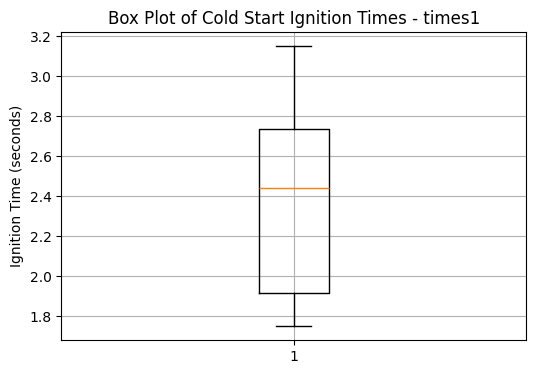

/tmp/ipython-input-5-1344564365.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([times1, times2], labels=["times1", "times2"])


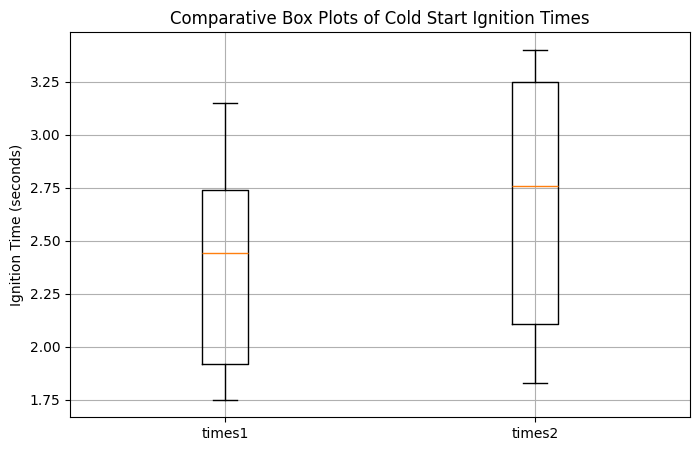

In [5]:
import numpy as np
import matplotlib.pyplot as plt

times1 = np.array([1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91])
times2 = np.array([1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35])

mean1 = np.mean(times1)
var1 = np.var(times1, ddof=1)
std1 = np.std(times1, ddof=1)
print("Cold Start Times - First Formulation (times1):")
print(f"Sample Mean: {mean1:.3f}")
print(f"Sample Variance: {var1:.3f}")
print(f"Sample Standard Deviation: {std1:.3f}\n")

#Individual boxplot for times1
plt.figure(figsize=(6, 4))
plt.boxplot(times1, vert=True)
plt.title("Box Plot of Cold Start Ignition Times - times1")
plt.ylabel("Ignition Time (seconds)")
plt.grid(True)
plt.show()

#Comparative box plots
plt.figure(figsize=(8, 5))
plt.boxplot([times1, times2], labels=["times1", "times2"])
plt.title("Comparative Box Plots of Cold Start Ignition Times")
plt.ylabel("Ignition Time (seconds)")
plt.grid(True)
plt.show()


Question 5

Degree 1 Polynomial - Test MSE: 4.659


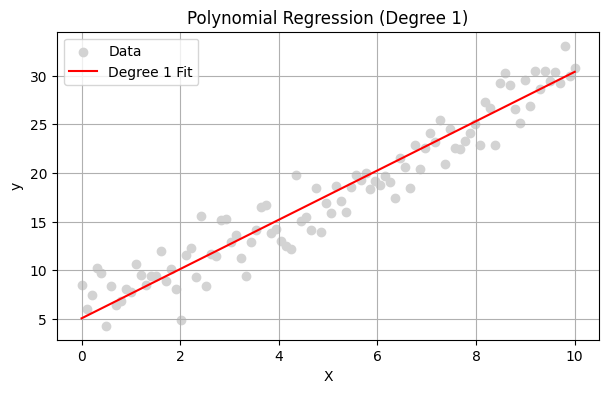

Degree 2 Polynomial - Test MSE: 3.459


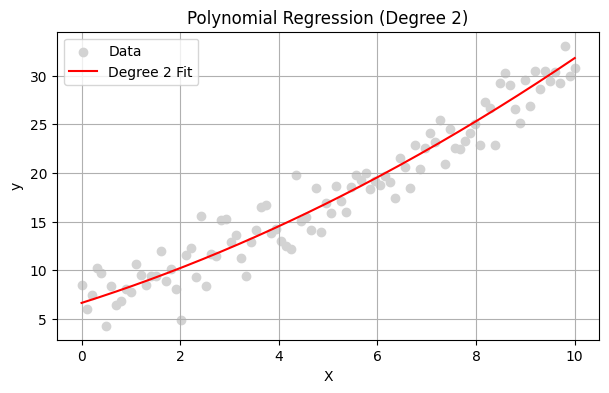

Degree 3 Polynomial - Test MSE: 3.458


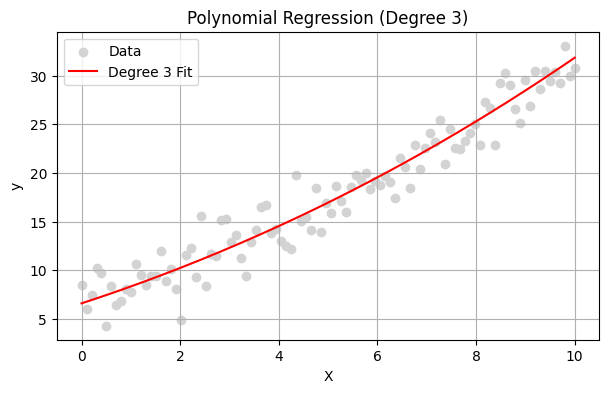

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, size=(n_samples, 1))  # zero-mean Gaussian noise
y = true_slope * X + true_intercept + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function
def fit_and_plot(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Degree {degree} Polynomial - Test MSE: {mse:.3f}")

    X_plot = np.linspace(0, 10, 200).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.figure(figsize=(7, 4))
    plt.scatter(X, y, color='lightgray', label='Data')
    plt.plot(X_plot, y_plot, color='r', label=f'Degree {degree} Fit')
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

for deg in [1, 2, 3]:
    fit_and_plot(deg)
